## 登月图片消噪

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as misc # 图片处理 miscellaneous 乱七八糟
# 同学们在导入scipy的时候 可能会报错 pip install scipy -i https://mirrors.aliyun.com/pypi/simple/

### 导入图片，观察黑白图片和彩色图片的区别

In [10]:
cat = plt.imread('./cat.jpg')
cat
cat.shape

(456, 730, 3)

In [12]:
moon = plt.imread('./moonlanding.png')
moon

array([[0.04705882, 0.        , 0.23921569, ..., 0.        , 0.00392157,
        0.53333336],
       [0.        , 0.        , 0.6784314 , ..., 0.10196079, 0.2901961 ,
        0.        ],
       [0.72156864, 0.10980392, 0.6039216 , ..., 0.        , 0.21568628,
        1.        ],
       ...,
       [0.00392157, 0.        , 1.        , ..., 1.        , 1.        ,
        0.95686275],
       [0.        , 0.        , 0.15686275, ..., 0.        , 0.        ,
        0.3529412 ],
       [1.        , 0.52156866, 0.04705882, ..., 0.        , 0.        ,
        1.        ]], dtype=float32)

In [6]:
moon.shape
[
    [[r,g,b],[],[],[]],
    [],
    []
]
[
    [0,255,12,200],
    [],
    []
]

(474, 630)

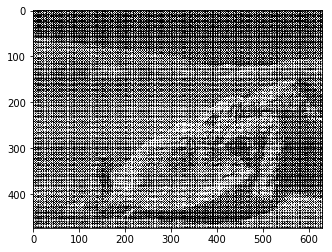

In [14]:
plt.imshow(moon,cmap='gray')

In [15]:
nd_color = np.array(
    [
        [[255,0,0],[0,255,0],[0,0,255]]
    ]
)

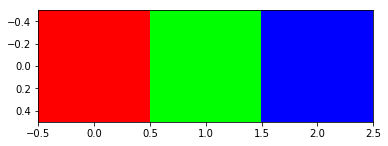

In [16]:
plt.imshow(nd_color)

In [59]:
nd_gray = np.array(
    [
        [250,180,180]
    ]
)

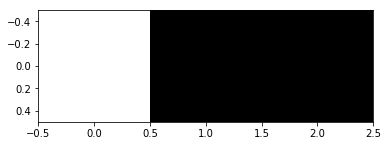

In [60]:
plt.imshow(nd_gray,cmap='gray')

### 图片的灰度化处理

In [ ]:
# 图片的灰度化处理 其实就是 把 最后一个维度的[r,g,b]  变成一个值
# 取最大值 取平均值 加权平均值 [r:g:b] [0.64:0.35:0.01]

In [26]:
cat

array([[[231, 186, 131],
        [232, 187, 132],
        [233, 188, 133],
        ...,
        [100,  54,  54],
        [ 92,  48,  47],
        [ 85,  43,  44]],

       [[232, 187, 132],
        [232, 187, 132],
        [233, 188, 133],
        ...,
        [100,  54,  54],
        [ 92,  48,  47],
        [ 84,  42,  43]],

       [[232, 187, 132],
        [233, 188, 133],
        [233, 188, 133],
        ...,
        [ 99,  53,  53],
        [ 91,  47,  46],
        [ 83,  41,  42]],

       ...,

       [[199, 119,  82],
        [199, 119,  82],
        [200, 120,  83],
        ...,
        [189,  99,  65],
        [187,  97,  63],
        [187,  97,  63]],

       [[199, 119,  82],
        [199, 119,  82],
        [199, 119,  82],
        ...,
        [188,  98,  64],
        [186,  96,  62],
        [188,  95,  62]],

       [[199, 119,  82],
        [199, 119,  82],
        [199, 119,  82],
        ...,
        [188,  98,  64],
        [188,  95,  62],
        [188,  95,  62]]

In [28]:
cat.max()  # max()是整个数组中的最大值
cat.max(axis=-1)
cat.max(axis=-1).shape

(456, 730)

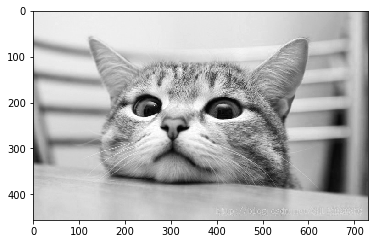

In [34]:
# 最大值
# plt.imshow(cat.max(axis=-1),cmap='gay')  # 需要设置颜色映射 spring 值故意写错 报错信息中会提示可用的颜色映射
plt.imshow(cat.max(axis=-1),cmap='gray')  #

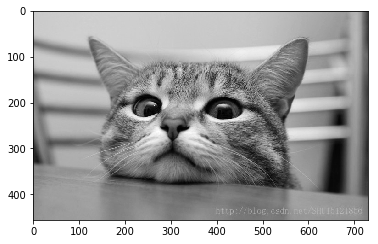

In [39]:
# 平均值
cat.mean(axis=-1)
plt.imshow(cat.mean(axis=-1),cmap='gray')

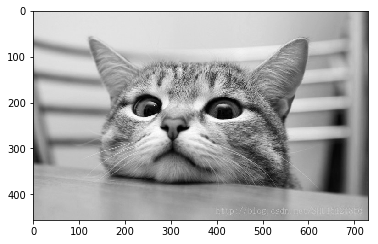

In [48]:
# 加权平均值 权重 [r:g:b] [0.64:0.35:0.01]  1 [3,4] [[],[]]
cat
weight = np.array([0.64,0.35,0.01])
cat2 = np.dot(cat,weight)
plt.imshow(cat2,cmap="gray")

### 通过傅里叶变换实现图片降噪

scipy.fftpack模块用来计算快速傅里叶变换  
速度比传统傅里叶变换更快，是对之前算法的改进  
图片是二维数据，注意使用fftpack的二维转变方法

In [62]:
from scipy.fftpack import fft2,ifft2

In [61]:
# 傅里叶变换 就是 把描述值的值 变成描述变化的值
moon

array([[0.04705882, 0.        , 0.23921569, ..., 0.        , 0.00392157,
        0.53333336],
       [0.        , 0.        , 0.6784314 , ..., 0.10196079, 0.2901961 ,
        0.        ],
       [0.72156864, 0.10980392, 0.6039216 , ..., 0.        , 0.21568628,
        1.        ],
       ...,
       [0.00392157, 0.        , 1.        , ..., 1.        , 1.        ,
        0.95686275],
       [0.        , 0.        , 0.15686275, ..., 0.        , 0.        ,
        0.3529412 ],
       [1.        , 0.52156866, 0.04705882, ..., 0.        , 0.        ,
        1.        ]], dtype=float32)

In [76]:
fft_moon = fft2(moon)  # 把描述值的值变成 描述变化的值
fft_moon[np.abs(fft_moon) > 2000] = 0  # 把变化大的 找出来 然后让变化归零
fft_moon 

array([[    0.        +0.j       ,     0.        +0.j       ,
         -322.093    -20.27744j  , ...,  -906.1585 +1539.3081j   ,
         -322.093    +20.27744j  ,     0.        +0.j       ],
       [    0.        +0.j       ,     0.        +0.j       ,
            0.        +0.j       , ...,  -677.34503 -936.16174j  ,
          354.6247 -1003.8348j   ,     0.        +0.j       ],
       [    0.        +0.j       , -1116.4065 +1338.3179j   ,
         -474.20056 +385.40216j  , ...,   239.7723  -977.2129j   ,
         1582.9283  -261.95346j  ,     0.        +0.j       ],
       ...,
       [    0.        +0.j       ,  -781.0807   +13.744501j ,
          377.90707  +12.6699295j, ..., -1526.7869 +1271.2621j   ,
            0.        +0.j       ,     0.        +0.j       ],
       [    0.        +0.j       ,     0.        +0.j       ,
         1582.9283  +261.95346j  , ...,     0.        +0.j       ,
         -474.20056 -385.40216j  , -1116.4065 -1338.3179j   ],
       [    0.        +0.j  

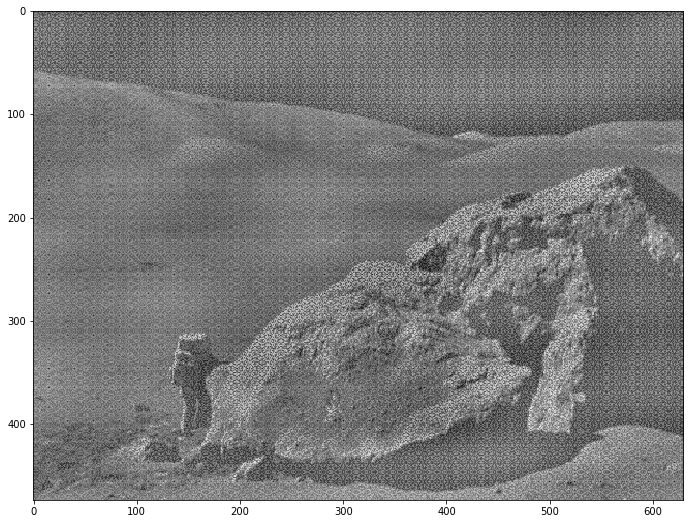

In [79]:
fft_moon  # 处理之后 把描述变化的值 再恢复成描述值的值
ifft_moon = np.real(ifft2(fft_moon))
plt.figure(figsize=(12,9))
plt.imshow(ifft_moon,cmap='gray')
plt.imsave('after.png',ifft_moon,cmap='gray')

图片进行过滤   
添加噪声，对噪声图片使用ndimage中的高斯滤波、中值滤波、signal中维纳滤波进行处理  
使图片变清楚

### 添加噪声
加载图片，使用灰色图片misc.face()添加噪声

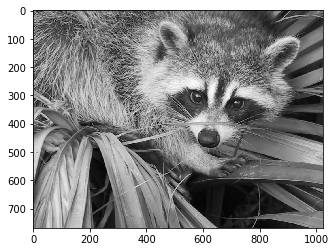

In [85]:
face = misc.face(gray=True)
plt.imshow(face,cmap='gray')

In [86]:
face.shape

(768, 1024)

In [87]:
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

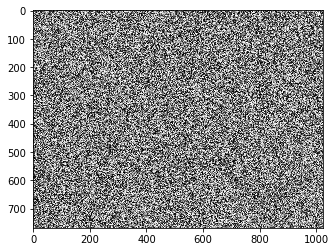

In [94]:
noise = np.random.randint(0,100,size=face.shape)
plt.imshow(noise,cmap='gray')

In [91]:
noise_face = face + noise

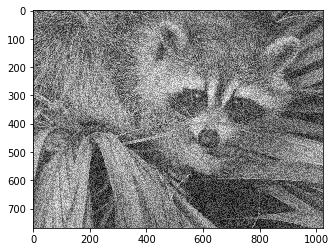

In [95]:
plt.imshow(noise_face,cmap='gray')

### ndimage处理噪声

median中值滤波参数size：给出在每个元素上从输入数组中取出的形状位置，定义过滤器功能的输入

gaussian高斯滤波参数sigma：高斯核的标准偏差

signal维纳滤波参数mysize：滤镜尺寸的标量

In [97]:
noise_face

array([[183, 141, 191, ..., 255, 181, 270],
       [161, 147, 140, ..., 261, 270, 165],
       [173, 217, 187, ..., 219, 197, 156],
       ...,
       [116, 237, 251, ..., 242, 216, 246],
       [157, 229, 218, ..., 271, 157, 224],
       [231, 204, 179, ..., 233, 203, 190]])

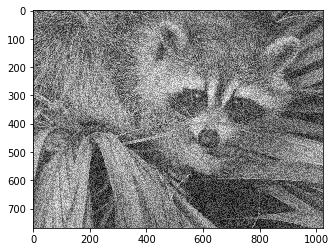

In [98]:
plt.imshow(noise_face,cmap='gray')

In [96]:
import scipy.ndimage as ndimage

In [116]:
# size 设定了选取范围的大小
mf_data = ndimage.median_filter(noise_face,size=5)
mf_data = ndimage.median_filter(moon,size=5)

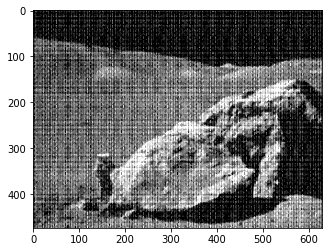

In [117]:
plt.imshow(mf_data,cmap='gray')

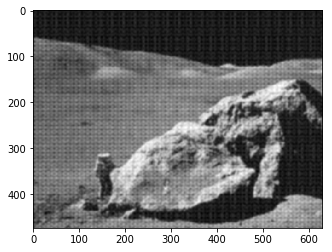

In [118]:
# 高斯滤波 sigma也是指定范围
gf_data = ndimage.gaussian_filter(noise_face,sigma=2)
gf_data = ndimage.gaussian_filter(moon,sigma=2)
plt.imshow(gf_data,cmap='gray')

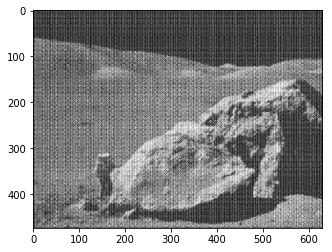

In [119]:
# 维也纳滤波 是选定一个范围 然后 通过调整值 让方差尽量小
from scipy.signal import wiener
w_data = wiener(noise_face,mysize=5)
w_data = wiener(moon,mysize=5)
plt.imshow(w_data,cmap='gray')

In [120]:
# 均值滤波 < 高斯滤波
# 高斯滤波（近景好）  维也纳滤波(远景好)

### 使用scipy.ndimage图片处理

使用scipy.misc.face(gray=True)获取图片，使用ndimage移动坐标、旋转图片、切割图片、缩放图片

In [18]:
import scipy.ndimage as ndimage

In [16]:
import scipy.misc
face = scipy.misc.face(gray=True)
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

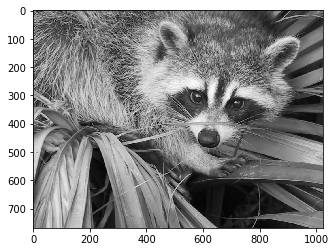

In [17]:
plt.imshow(face,cmap='gray')

shift移动坐标

In [20]:
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

In [27]:
# shift 移动矩阵 参数 input要移动的矩阵  shift移动的值
shift1 = ndimage.shift(input=face,shift=100)  # 往右往下都是100
shift1 = ndimage.shift(input=face,shift=[-100,200])  # 先上下 后左右
shift1

array([[ 0,  0,  0, ..., 72, 64, 58],
       [ 0,  0,  0, ..., 69, 66, 62],
       [ 0,  0,  0, ..., 72, 72, 70],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [35]:
# 参数 mode='constant'用来指定填充模式 默认constant是用0来填充  {'reflect', 'constant', 'nearest', 'mirror', 'wrap'}
shift1 = ndimage.shift(input=face,shift=[-100,200],mode='wrap')

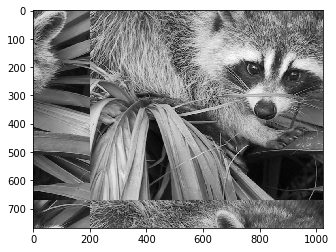

In [36]:
plt.imshow(shift1,cmap='gray')

rotate旋转图片

In [40]:
# 用来旋转图片 input要旋转的矩阵 angle旋转多少度
# rotate1 = ndimage.rotate(input=face,angle=45)
rotate1 = ndimage.rotate(input=face,angle=90)
rotate1

array([[  0, 146, 145, ..., 143, 142, 140],
       [  0, 134, 134, ..., 143, 142, 141],
       [  0, 118, 119, ..., 144, 143, 142],
       ...,
       [145, 123, 109, ..., 116, 120, 119],
       [130, 104,  88, ..., 103, 104, 106],
       [114,  83,  68, ...,  98,  94,  94]], dtype=uint8)

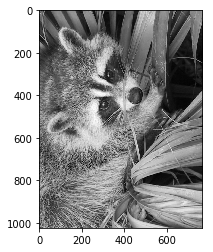

In [41]:
plt.imshow(rotate1,cmap='gray')

zoom缩放图片

In [52]:
face
face.shape

(768, 1024)

In [53]:
# 对矩阵进行缩放 input要缩放的矩阵 zoom放大的倍数
# z1 = ndimage.zoom(input=face,zoom=0.5)
# z1 = ndimage.zoom(input=face,zoom=2)
# z1 = ndimage.zoom(input=face,zoom=[0.5,1])
# z1 = ndimage.zoom(input=face,zoom=[1,0.5])
z1 = ndimage.zoom(input=face,zoom=[500/768,500/1024])  # 500,500
z1

array([[114, 145, 147, ..., 123, 119,   0],
       [ 71, 114, 126, ..., 106, 118,   0],
       [ 79, 110, 122, ..., 112, 119,   0],
       ...,
       [110, 110, 132, ..., 144, 144,   0],
       [ 95, 119, 135, ..., 145, 144,   0],
       [ 94, 120, 131, ..., 143, 142,   0]], dtype=uint8)

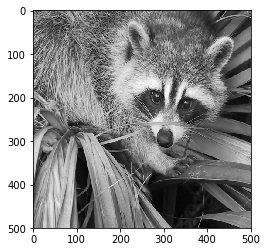

In [54]:
plt.imshow(z1,cmap='gray')

切割图片

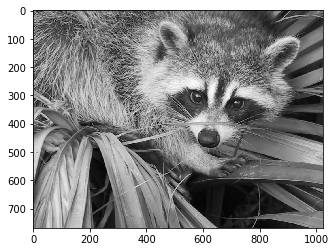

In [55]:
plt.imshow(face,cmap='gray')

In [56]:
face[:500,400:900]

array([[ 73,  77,  81, ...,  25,  20,  22],
       [ 89,  87,  89, ...,  30,  27,  22],
       [102,  96,  93, ...,  30,  29,  25],
       ...,
       [ 94,  93,  92, ..., 139, 140, 140],
       [ 90,  89,  86, ..., 139, 139, 140],
       [ 64,  64,  62, ..., 138, 139, 140]], dtype=uint8)

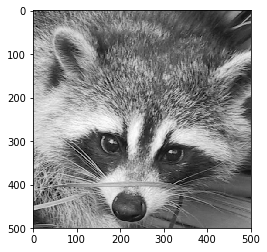

In [57]:
plt.imshow(face[:500,400:900],cmap='gray')

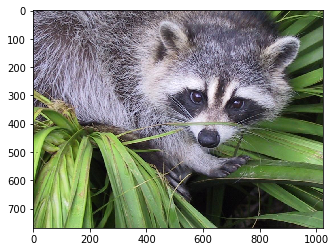

In [150]:
face = scipy.misc.face()
plt.imshow(face)

In [153]:
head

array([[[ 79,  72,  79],
        [ 83,  76,  83],
        [ 87,  80,  87],
        ...,
        [ 16,  29,  20],
        [ 11,  24,  15],
        [ 15,  26,  18]],

       [[ 95,  88,  95],
        [ 93,  86,  93],
        [ 95,  88,  95],
        ...,
        [ 21,  34,  25],
        [ 18,  31,  22],
        [ 15,  26,  18]],

       [[109, 102, 109],
        [102,  95, 102],
        [ 99,  92,  99],
        ...,
        [ 21,  34,  25],
        [ 20,  33,  23],
        [ 17,  29,  19]],

       ...,

       [[ 83, 103,  50],
        [ 82, 102,  49],
        [ 81, 101,  48],
        ...,
        [108, 157,  78],
        [109, 158,  79],
        [109, 158,  79]],

       [[ 81,  98,  54],
        [ 80,  97,  53],
        [ 77,  94,  50],
        ...,
        [108, 157,  78],
        [108, 157,  78],
        [109, 158,  79]],

       [[ 56,  70,  37],
        [ 56,  70,  37],
        [ 54,  68,  35],
        ...,
        [107, 156,  77],
        [108, 157,  78],
        [109, 158,  79]]

array([[[ 79,  72,  79],
        [100,  93, 100],
        [ 84,  77,  84],
        ...,
        [ 55,  69,  36],
        [ 24,  34,  10],
        [ 15,  26,  18]],

       [[142, 135, 142],
        [124, 117, 124],
        [101,  94, 101],
        ...,
        [ 19,  31,   9],
        [ 22,  30,  17],
        [ 19,  32,  12]],

       [[175, 168, 175],
        [ 73,  66,  73],
        [113, 106, 113],
        ...,
        [ 20,  29,  12],
        [ 27,  38,  21],
        [138, 153, 112]],

       ...,

       [[ 51,  49,  37],
        [ 54,  52,  39],
        [ 29,  25,  13],
        ...,
        [106, 149,  70],
        [107, 150,  71],
        [111, 152,  73]],

       [[ 92, 115,  63],
        [ 82, 101,  49],
        [ 78,  97,  41],
        ...,
        [104, 148,  73],
        [107, 153,  78],
        [108, 159,  82]],

       [[ 56,  70,  37],
        [ 40,  53,  23],
        [ 34,  47,  19],
        ...,
        [106, 150,  75],
        [108, 152,  77],
        [109, 158,  79]]

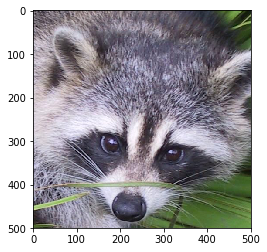

In [146]:
plt.imshow(face[:500,400:900])
head = face[:500,400:900]
head
headz = ndimage.zoom(head,[0.2,0.2,1])
headz

In [151]:
jin = plt.imread('./jin.png')
jin

array([[[0.24313726, 0.24313726, 0.24705882],
        [0.22745098, 0.23137255, 0.2509804 ],
        [0.38039216, 0.3882353 , 0.42352942],
        ...,
        [0.34509805, 0.36078432, 0.3764706 ],
        [0.12941177, 0.12941177, 0.13333334],
        [0.7411765 , 0.7411765 , 0.7411765 ]],

       [[0.14117648, 0.14509805, 0.14901961],
        [0.47843137, 0.49019608, 0.53333336],
        [0.87058824, 0.8901961 , 0.96862745],
        ...,
        [0.8117647 , 0.84705883, 0.8784314 ],
        [0.2901961 , 0.29411766, 0.29803923],
        [0.77254903, 0.77254903, 0.77254903]],

       [[0.3529412 , 0.35686275, 0.3647059 ],
        [0.5176471 , 0.5294118 , 0.5764706 ],
        [0.88235295, 0.9019608 , 0.9764706 ],
        ...,
        [0.827451  , 0.8627451 , 0.89411765],
        [0.29803923, 0.3019608 , 0.30588236],
        [0.7764706 , 0.7764706 , 0.7764706 ]],

       ...,

       [[0.33333334, 0.34509805, 0.35686275],
        [0.21176471, 0.27450982, 0.3254902 ],
        [0.36078432, 0

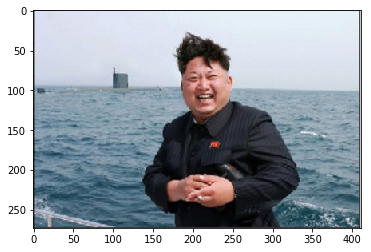

In [152]:
plt.imshow(jin)

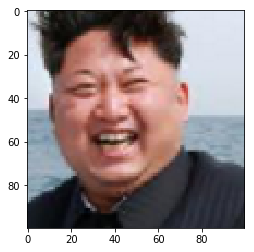

In [156]:
plt.imshow(jin[50:150,175:275])

In [155]:
headz.shape
headz/255

array([[[0.30980392, 0.28235294, 0.30980392],
        [0.39215686, 0.36470588, 0.39215686],
        [0.32941176, 0.30196078, 0.32941176],
        ...,
        [0.21568627, 0.27058824, 0.14117647],
        [0.09411765, 0.13333333, 0.03921569],
        [0.05882353, 0.10196078, 0.07058824]],

       [[0.55686275, 0.52941176, 0.55686275],
        [0.48627451, 0.45882353, 0.48627451],
        [0.39607843, 0.36862745, 0.39607843],
        ...,
        [0.0745098 , 0.12156863, 0.03529412],
        [0.08627451, 0.11764706, 0.06666667],
        [0.0745098 , 0.1254902 , 0.04705882]],

       [[0.68627451, 0.65882353, 0.68627451],
        [0.28627451, 0.25882353, 0.28627451],
        [0.44313725, 0.41568627, 0.44313725],
        ...,
        [0.07843137, 0.11372549, 0.04705882],
        [0.10588235, 0.14901961, 0.08235294],
        [0.54117647, 0.6       , 0.43921569]],

       ...,

       [[0.2       , 0.19215686, 0.14509804],
        [0.21176471, 0.20392157, 0.15294118],
        [0.11372549, 0

In [100]:
jin[25:125,175:275].shape
jin[25:125,175:275].shape

(100, 100, 3)

In [157]:
jin[50:150,175:275]=headz/255

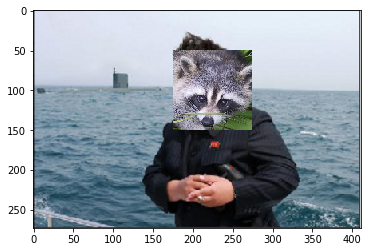

In [149]:
plt.imshow(jin)

### 数值积分，求解圆周率

求解圆周率

因为圆形的面积为 pi * r**2

只要求得面积 即可得到pi

想得到圆形面积 可以先绘制一个圆形 然后求积分

1. 对函数(1 - x^2)^0.5进行积分 

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

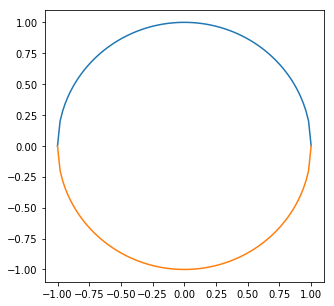

In [8]:
# x**2 + y**2 = 1
# y**2 = 1 - x**2
# y = (1-x**2)**0.5
f = lambda x:(1-x**2)**0.5
x = np.linspace(-1,1,100)
x
y = f(x)
y
plt.figure(figsize=(5,5))
plt.plot(x,y)
plt.plot(x,-y)

2. 求圆的面积 (使用scipy.integrate进行积分，调用quad()方法)

In [9]:
import scipy.integrate as integrate

In [13]:
# func 对应关系（函数）, a是x轴的起始值, b是x轴的终止值
res,error = integrate.quad(f,-1,1)  # 半径是1的圆形 面积 pi 
print('圆周率是：',res*2,'误差是：',error*2)

圆周率是： 3.141592653589797 误差是： 2.000471344132393e-09
